In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Download some training data. MNIST in this example
# More about datasets available in Pytorch here: https://pytorch.org/vision/stable/datasets.html

train_dataset = torchvision.datasets.MNIST(root = '.', train=True, transform=transforms.ToTensor(),download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 26990134.56it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 24919912.33it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 18226046.04it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12282739.37it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
# Lets look at some charatersitics of the training data
print('Input data shape is:', train_dataset.data.shape)
print('Maximum value of entry in data is:', train_dataset.data.max())
print('Minimum value of entry in data is:', train_dataset.data.min())



Input data shape is: torch.Size([60000, 28, 28])
Maximum value of entry in data is: tensor(255, dtype=torch.uint8)
Minimum value of entry in data is: tensor(0, dtype=torch.uint8)


The sample data is: 
 tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118, 219,
         166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254, 254,
         254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0, 

Text(0.5, 1.0, 'Sample data image')

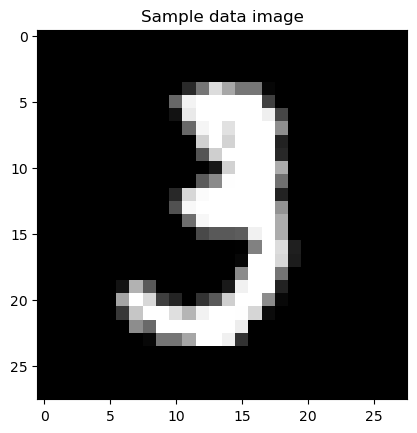

In [4]:
# Chose a sample from train data and print its value and also display as an image
i = 10
print('The sample data is: \n', train_dataset.data[i,:,:])
plt.imshow(train_dataset.data[i,:,:], cmap = 'gray')
plt.title('Sample data image')

In [5]:
# Labels/Targets of train dataset

print('The shape of target is:', train_dataset.targets.shape)
print('The target value of ith train data sample above is:', train_dataset.targets[i] )

The shape of target is: torch.Size([60000])
The target value of ith train data sample above is: tensor(3)


In [6]:
# Get the test data as well
test_dataset = torchvision.datasets.MNIST(root = '.', train=False, transform=transforms.ToTensor(),download=True)

In [7]:
# Lets look at some charatersitics of the training data and thier targets
print('Input data shape is:', test_dataset.data.shape)
print('Maximum value of entry in data is:', test_dataset.data.max())
print('Minimum value of entry in data is:', test_dataset.data.min())
print('The shape of target is:', test_dataset.targets.shape)

Input data shape is: torch.Size([10000, 28, 28])
Maximum value of entry in data is: tensor(255, dtype=torch.uint8)
Minimum value of entry in data is: tensor(0, dtype=torch.uint8)
The shape of target is: torch.Size([10000])


In [8]:
# Lets build a simple Artificial Neural Netowrk Model
input_size = train_dataset.data.size(-1)*train_dataset.data.size(-2) # We flatten image to a vector in Fully connected NN, so find length of data
print(input_size)
model = nn.Sequential(
      nn.Linear(input_size,128),
      nn.ReLU(),
      #nn.Linear(256,128),
      #nn.ReLU(),
      nn.Linear(128,10)
)


784


In [9]:
# Choose Device
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
print('The device being used is:', device)
model.to(device)

The device being used is: cpu


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [10]:
# Choose the Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [11]:
# In Deep Learning frameworks, learning parameters/optimization is done over batches.
# Data Loader generates such batches of data automatically, shuffles data, maps data tp 0-1 and other processing.
# Define batch size, call data loader for train data and test data

batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle = True)
test_loader  = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle = True)

In [12]:
# Batch Example: Illustration how data loader works in Pytorch
# Lets set batch_size = 1 and check the data and target
# Note how the data is now mapped to (0,1)
# The first dimension = batch_size
batch_example = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2, shuffle = True)
for input, target in batch_example:
  print('The shape of data  is:', input.shape)
  print('The shape of target is:', target.shape)
  print('The sample data input is:', input)
  break

The shape of data  is: torch.Size([2, 1, 28, 28])
The shape of target is: torch.Size([2])
The sample data input is: tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])


In [13]:
# Define some training parameters, initlialize some variables to store results and train the model
num_epochs = 10
train_losses = np.zeros(num_epochs) # used to save loss at each epoch so we could see the loss curve and convergence
test_losses = np.zeros(num_epochs)

for n in range(num_epochs):
  train_loss = [] # train loss during each iteration
  for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device) # data is moved to the device
    inputs = inputs.view(-1,input_size) # Returns a new tensor with the same data as the :attr:`self` tensor but of a different :attr:`shape`.

    #The optimizer zero_grad() method sets the gradients of all optimized torch Tensors to zero.
    #This is useful to do before each backward pass, as it ensures that the gradients are not accumulating from previous iterations.
    optimizer.zero_grad()

    outputs = model(inputs) # Forward pass of the model
    loss = criterion(outputs,targets)

    loss.backward() # Backward pass of the model
    optimizer.step()

    train_loss.append(loss.item())

  # train loss and test loss for each epoch
  train_loss = np.mean(train_loss) # train loss for each epoch

  test_loss = []
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device) # data is moved to the device
    inputs = inputs.view(-1,input_size)
    outputs = model(inputs)
    loss = criterion(outputs,targets)
    test_loss.append(loss.item())

  test_loss = np.mean(test_loss)

  # push train and test loss of each epcoh
  train_losses[n] = train_loss
  test_losses[n] = test_loss

  print(f'Epoch {n+1}/{num_epochs}, Train Loss: {train_loss:.2f}, Test Loss: {test_loss:.2f}')



Epoch 1/10, Train Loss: 0.41, Test Loss: 0.22
Epoch 2/10, Train Loss: 0.19, Test Loss: 0.15
Epoch 3/10, Train Loss: 0.13, Test Loss: 0.12
Epoch 4/10, Train Loss: 0.10, Test Loss: 0.10
Epoch 5/10, Train Loss: 0.09, Test Loss: 0.09
Epoch 6/10, Train Loss: 0.07, Test Loss: 0.09
Epoch 7/10, Train Loss: 0.06, Test Loss: 0.08
Epoch 8/10, Train Loss: 0.05, Test Loss: 0.09
Epoch 9/10, Train Loss: 0.04, Test Loss: 0.08
Epoch 10/10, Train Loss: 0.04, Test Loss: 0.07


Text(0.5, 1.0, 'Training and Test Loss')

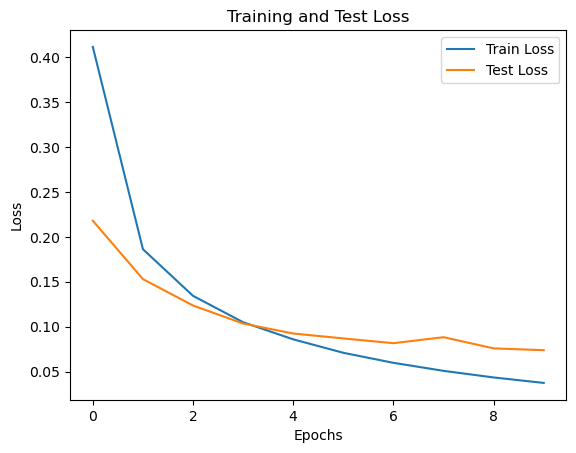

In [14]:
# plot train loss and test loss for each epoch
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Loss')



In [15]:
# Compute Training and Test Accuracy
# We pass training data and test data through the model we trained and calculate correct guesses in each case
# For Training Data
num_correct_train = 0
num_total_train = 0

for inputs, targets in train_loader:
  inputs, targets = inputs.to(device), targets.to(device)

  inputs = inputs.view(-1,input_size)

  # Pass train data in the model that is trained
  outputs = model(inputs)

  # Output is of size 1x numclass with predicted class having highest value. index with max val is the predicted class. #one hot encoding
  val, predictions = torch.max(outputs, 1)

  # Check if prediction is correct or not and update count if prediction is correct
  num_correct_train += (predictions == targets).sum().item()
  num_total_train += targets.shape[0]



In [16]:
train_accuracy = num_correct_train/num_total_train
print(f'The Training Accuracy is {train_accuracy*100:.2f}%')

The Training Accuracy is 99.19%


In [17]:
# Evaluate Model: Compute Training and Test Accuracy
# We pass training data and test data through the model we trained and calculate correct guesses in each case
# For Test Data

num_correct_test = 0
num_total_test = 0
predictions_test = np.array([]) #  numpy array to store predictions for entire test dataset. Will be used for confusion matrix later
targets_test = np.array([])   #  numpy array to store true targets for entire test dataset. Will be used for confusion matrix later
for inputs, targets in test_loader:
  inputs, targets = inputs.to(device), targets.to(device)

  inputs = inputs.view(-1,input_size)

  # Pass train data in the model that is trained
  outputs = model(inputs)

  # Output is of size 1x numclass with predicted class having highest value. index with max val is the predicted class. #one hot encoding
  val, predictions = torch.max(outputs,1);

  predictions_test = np.concatenate((predictions_test, predictions.cpu().numpy()))
  targets_test     = np.concatenate((targets_test,targets.cpu().numpy()))
  # Check if prediction is correct or not and update count if prediction is correct
  num_correct_test += (predictions == targets).sum().item()
  num_total_test += targets.shape[0]

In [18]:
test_accuracy = num_correct_test/num_total_test
print(f'The Test Accuracy is {test_accuracy*100:.2f}%')

The Test Accuracy is 97.61%


In [2]:
# Create a Confusion matrix for Test Data Prediction and  actual Targets
# We will use confusion_matrix from sklearn
from sklearn.metrics import confusion_matrix # confusion matrix take predcited and actual target as input arguments
import seaborn as sns
class_labels = torch.unique(test_dataset.targets).numpy()
#class_lables = np.array2string(class_lables)

cm = confusion_matrix(targets_test, predictions_test)
# Confusion Matrix HeatMap without Normalization
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)



NameError: name 'test_dataset' is not defined

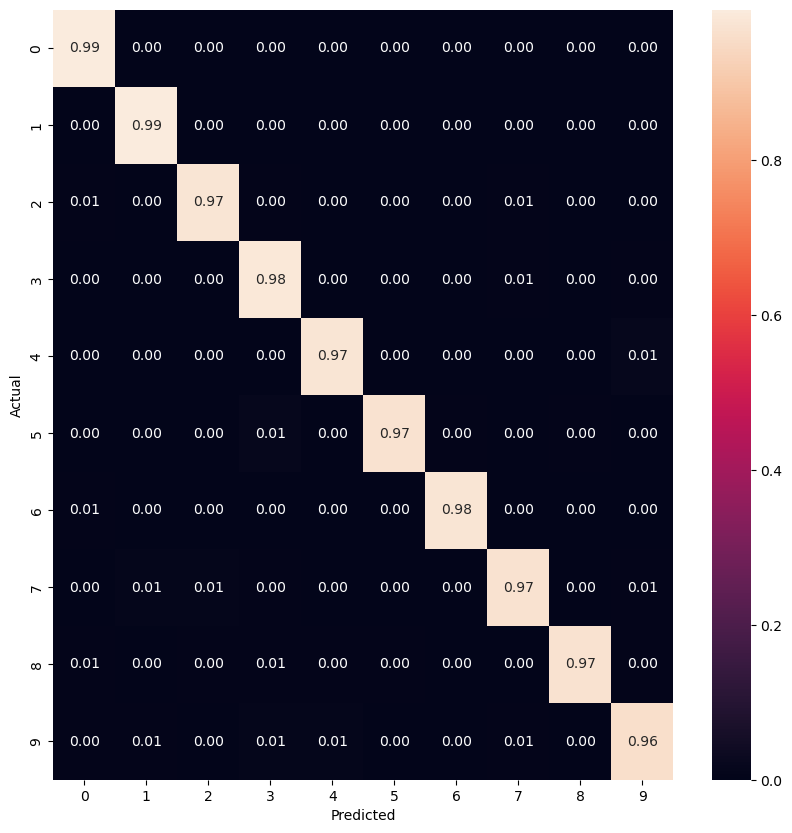

In [20]:
# Confusion Matrix HeatMap with Normalization
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)